In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_s_curve, make_swiss_roll, make_circles, make_blobs
from sklearn.manifold import LocallyLinearEmbedding, TSNE
from sklearn.neighbors import NearestNeighbors
from scipy.stats import gaussian_kde
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

from scipy.stats import norm, t



# 1) PCA

## 1.1) S-Curve

In [2]:
X, color = make_s_curve(n_samples =1000, random_state=42)
X.shape

(1000, 3)

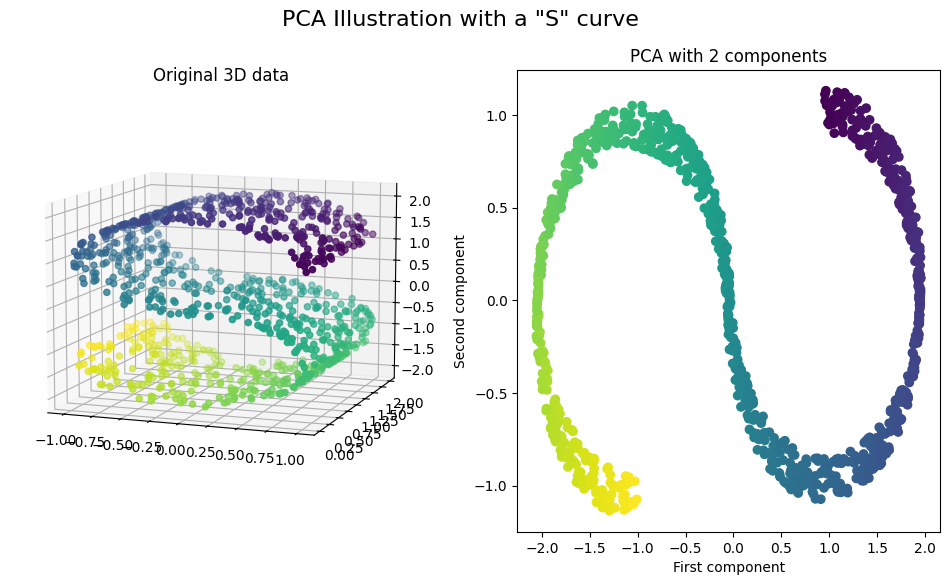

In [8]:

X, color = make_s_curve(n_samples =1000, random_state=42)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig = plt.figure(figsize=(12, 6))
fig.suptitle('PCA Illustration with a "S" curve', fontsize=16)

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.viridis)
ax1.set_title("Original 3D data")
ax1.view_init(10, -70) #To see the "S"

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.viridis)
ax2.set_title("PCA with 2 components")
ax2.set_xlabel('First component')
ax2.set_ylabel('Second component')

plt.show()


In [9]:
pca.explained_variance_ratio_

array([0.69888644, 0.17924909, 0.12186446])

## 1.2) Swiss Roll

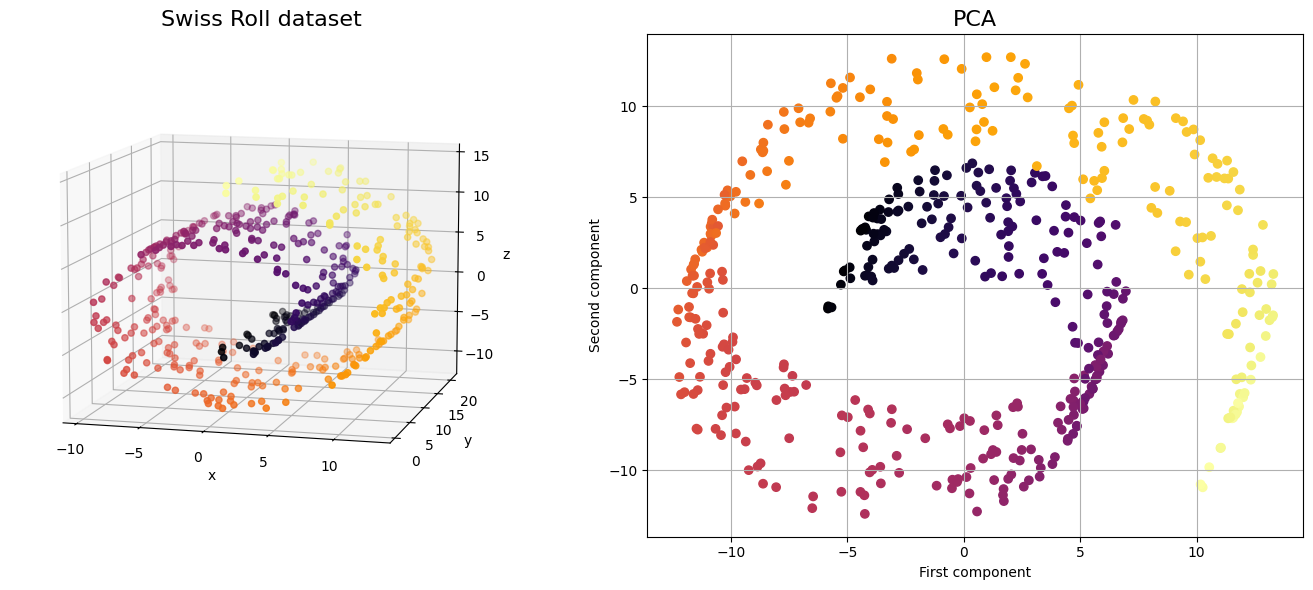

In [3]:
n_samples = 500
X, color = make_swiss_roll(n_samples, noise=0.01)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("Swiss Roll dataset", fontsize=16)
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.inferno)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=10, azim=-75) # To see the "S" curve

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("PCA", fontsize=16)
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.inferno)
ax2.set_xlabel('First component')
ax2.set_ylabel('Second component')
ax2.grid(True)

# Afficher les graphiques
plt.tight_layout()
plt.show()


# 2) LLE


## 2.1) Illustration

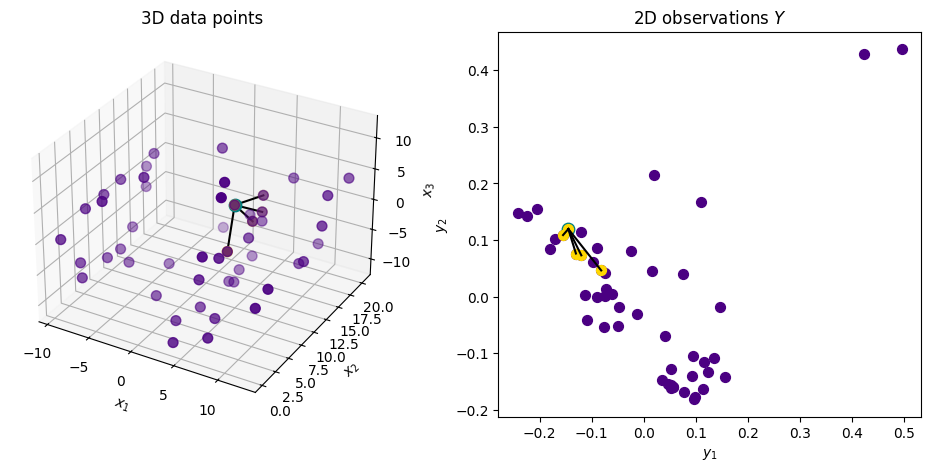

In [10]:

n_samples = 50
X, _ = make_swiss_roll(n_samples, noise=0.05)

n_neighbors = 5
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2)
X_reduced = lle.fit_transform(X)

point_idx = 10
neighbors = NearestNeighbors(n_neighbors=n_neighbors).fit(X)
distances, indices = neighbors.kneighbors([X[point_idx]])

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='indigo', s=50)
ax.scatter(X[point_idx, 0], X[point_idx, 1], X[point_idx, 2], c='teal', s=80)
ax.scatter(X[indices[0], 0], X[indices[0], 1], X[indices[0], 2], c='gold', s=50)
for i in indices[0]:
    ax.plot([X[point_idx, 0], X[i, 0]],
            [X[point_idx, 1], X[i, 1]],
            [X[point_idx, 2], X[i, 2]], 'k-')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.set_title("3D data points")

# Plot 2D
ax2 = fig.add_subplot(122)
ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], c='indigo', s=50)
ax2.scatter(X_reduced[point_idx, 0], X_reduced[point_idx, 1], c='teal', s=80)
ax2.scatter(X_reduced[indices[0], 0], X_reduced[indices[0], 1], c='gold', s=50)
for i in indices[0]:
    ax2.plot([X_reduced[point_idx, 0], X_reduced[i, 0]],
             [X_reduced[point_idx, 1], X_reduced[i, 1]], 'k-')
ax2.set_xlabel('$y_1$')
ax2.set_ylabel('$y_2$')
ax2.set_title("2D observations $Y$")

plt.show()


## 2.2) S curve

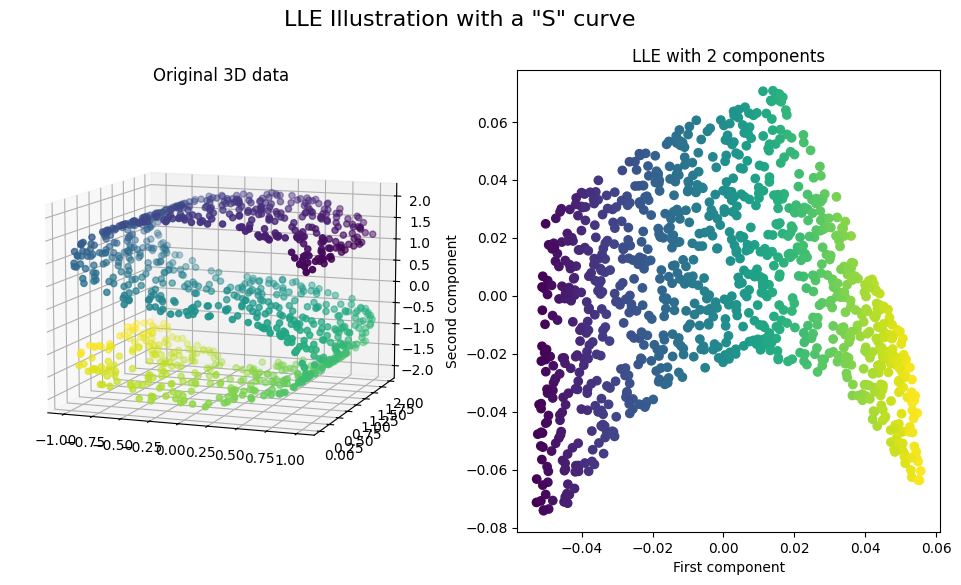

In [11]:

X, color = make_s_curve(n_samples =1000, random_state=42)

lle = LocallyLinearEmbedding(n_neighbors=12, n_components=2, method='standard', random_state=42)
X_lle = lle.fit_transform(X)

fig = plt.figure(figsize=(12, 6))
fig.suptitle('LLE Illustration with a "S" curve', fontsize=16)

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.viridis)
ax1.set_title("Original 3D data")
ax1.view_init(10, -70) #To see the "S"

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.viridis)
ax2.set_title("LLE with 2 components")
ax2.set_xlabel('First component')
ax2.set_ylabel('Second component')

plt.show()

## 2.3) Swiss roll

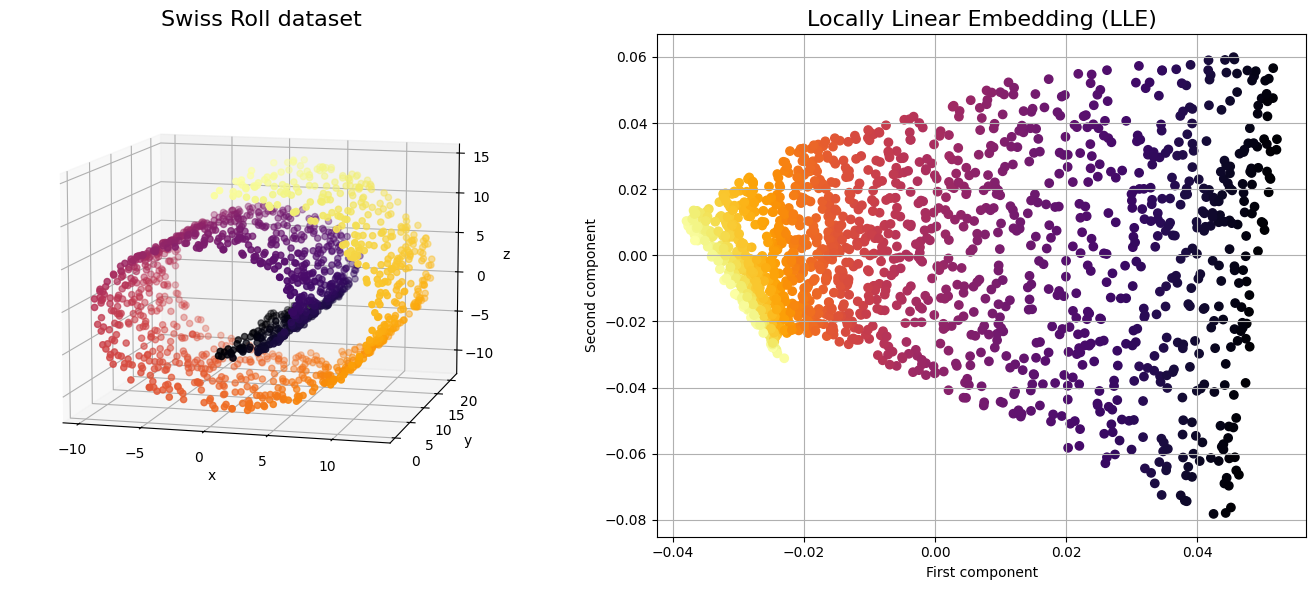

In [13]:
X, color = make_swiss_roll(n_samples=1500, noise=0.1, random_state=42)

lle = LocallyLinearEmbedding(n_neighbors=25, n_components=2, random_state=42, method='standard')

X_lle = lle.fit_transform(X)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("Swiss Roll dataset", fontsize=16)
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.inferno)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=10, azim=-75) 

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Locally Linear Embedding (LLE)", fontsize=16)
scatter2 = ax2.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.inferno)
ax2.set_xlabel('First component')
ax2.set_ylabel('Second component')
ax2.grid(True)

# Afficher les graphiques
plt.tight_layout()
plt.show()

# 3) t-SNE

## 3.1) Illustration (principle)

/var/folders/_v/vzmmycq54tx6qn34rbm0k8080000gn/T/ipykernel_68704/3324593839.py:43: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  halo = plt.Circle((point_ld[0], point_ld[1]), radius=2.5, color='red', alpha=0.2, edgecolor='none')


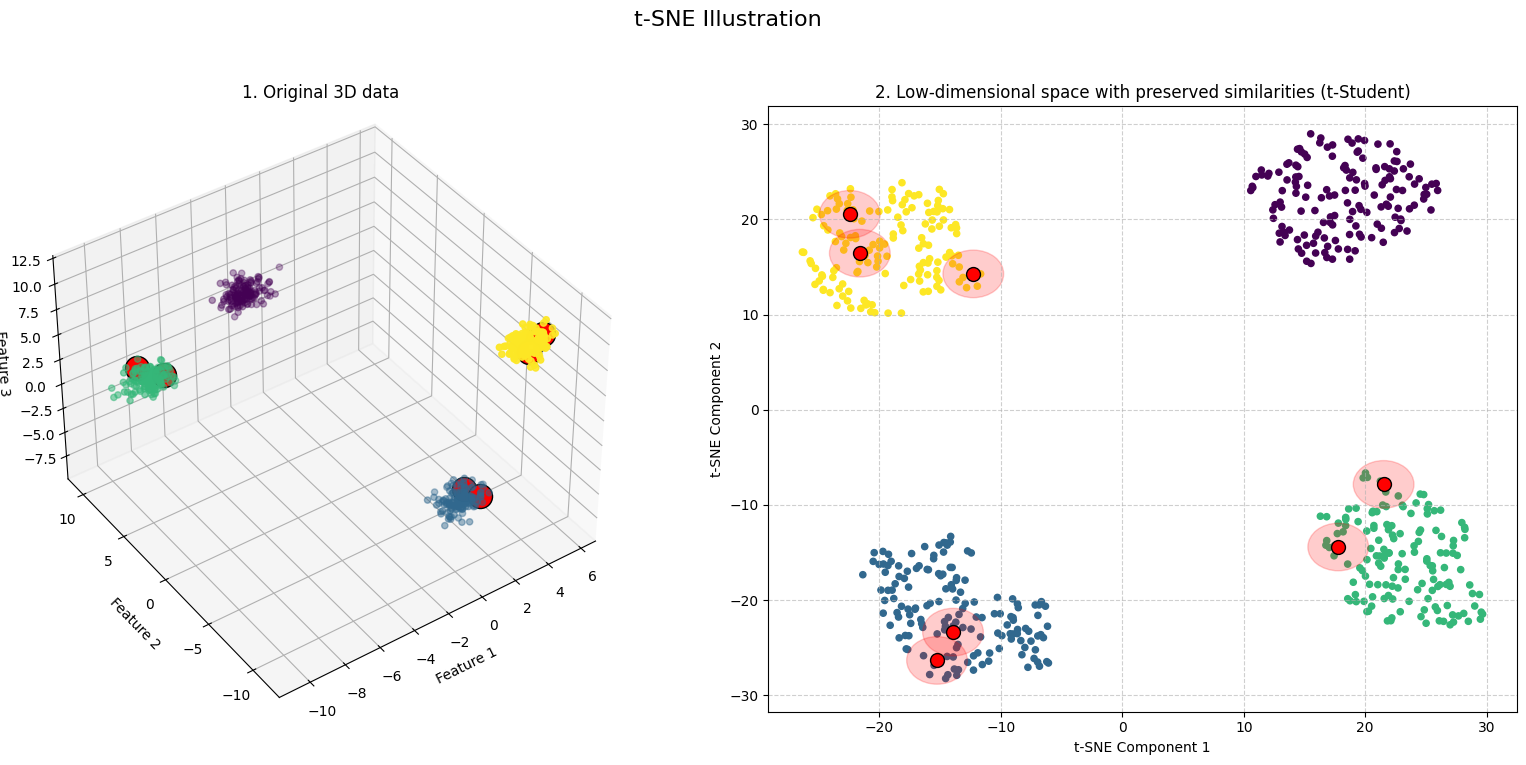

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_s_curve
from sklearn.manifold import TSNE

X, color = make_blobs(n_samples=600, n_features=3, centers=4, cluster_std=0.6, random_state=42)

fig = plt.figure(figsize=(16, 8))
fig.suptitle("t-SNE Illustration ", fontsize=16)

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("1. Original 3D data")
scatter_hd = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.viridis, s=20)
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.set_zlabel("Feature 3")
ax1.view_init(10, -70) 

np.random.seed(0)
sample_indices = np.random.choice(len(X), 7, replace=False)

ax1.view_init(elev=40, azim=235) 

for idx in sample_indices:
    point = X[idx]
    ax1.scatter(point[0], point[1], point[2], c='red', s=300, edgecolor='k', depthshade=False, zorder=10)



ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("2. Low-dimensional space with preserved similarities (t-Student)")

tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

scatter_ld = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.viridis, s=20)
ax2.set_xlabel("t-SNE Component 1")
ax2.set_ylabel("t-SNE Component 2")
ax2.grid(True, linestyle='--', alpha=0.6)

for idx in sample_indices:
    point_ld = X_tsne[idx]
    halo = plt.Circle((point_ld[0], point_ld[1]), radius=2.5, color='red', alpha=0.2, edgecolor='none')
    ax2.add_patch(halo)
    ax2.scatter(point_ld[0], point_ld[1], c='red', s=100, edgecolor='k', zorder=10)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 3.2) Illustration (distributions)

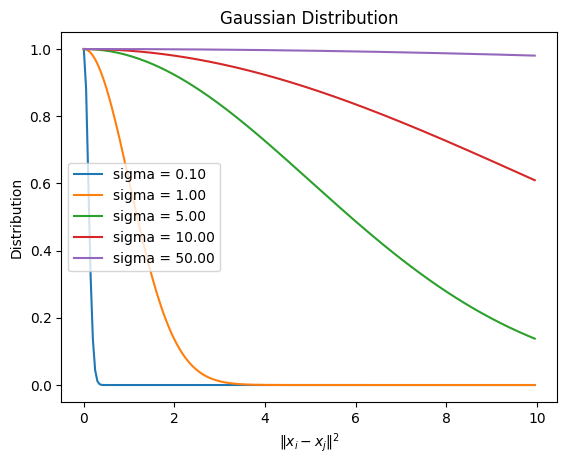

In [8]:
x=np.arange(0,10,0.05)
sigma=[0.1,1,5,10,50]
l=[]
for  s in sigma:
    l_i=np.exp(-x*x/(2*s*s))
    l.append(l_i)
fig, ax2 = plt.subplots()

leg = []
for i in range(len(sigma)):
    ax2.plot(x, l[i])
    leg.append(f'sigma = {sigma[i]:.2f}')

ax2.legend(leg)
ax2.set_title('Gaussian Distribution')
ax2.set_xlabel(r'$\|x_i - x_j\|^2$')
ax2.set_ylabel(r'Distribution')

plt.show()

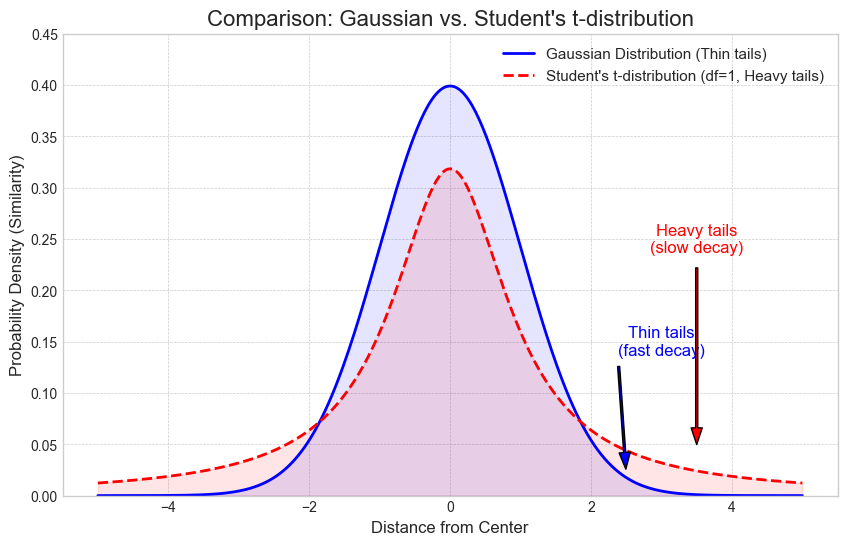

In [9]:
x = np.linspace(-5, 5, 400)

pdf_gaussian = norm.pdf(x, loc=0, scale=1)

df = 1
pdf_student = t.pdf(x, df=df, loc=0, scale=1)

# --- 2. Create the Plot ---
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')

plt.plot(x, pdf_gaussian, color='blue', linewidth=2, label='Gaussian Distribution (Thin tails)')
plt.plot(x, pdf_student, color='red', linewidth=2, linestyle='--', label=f"Student's t-distribution (df={df}, Heavy tails)")

plt.fill_between(x, pdf_gaussian, color='blue', alpha=0.1)
plt.fill_between(x, pdf_student, color='red', alpha=0.1)

plt.annotate(
    'Thin tails\n(fast decay)',
    xy=(2.5, 0.02),
    xytext=(3, 0.15),
    arrowprops=dict(facecolor='blue', shrink=0.05, width=1.5, headwidth=8),
    ha='center', va='center', fontsize=12, color='blue'
)

plt.annotate(
    'Heavy tails\n(slow decay)',
    xy=(3.5, 0.04),
    xytext=(3.5, 0.25),
    arrowprops=dict(facecolor='red', shrink=0.05, width=1.5, headwidth=8),
    ha='center', va='center', fontsize=12, color='red'
)

plt.title("Comparison: Gaussian vs. Student's t-distribution", fontsize=16)
plt.xlabel('Distance from Center', fontsize=12)
plt.ylabel('Probability Density (Similarity)', fontsize=12)
plt.legend(fontsize=11)
plt.ylim(0, 0.45) 
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

## 3.3) S curve

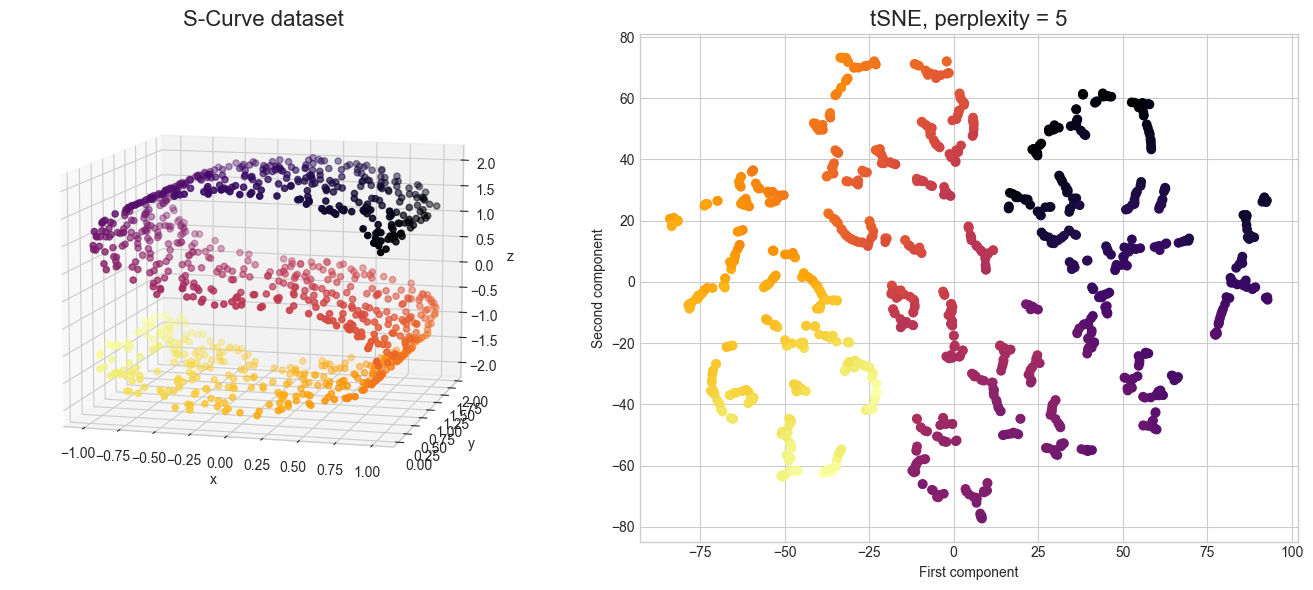

In [10]:
X, color = make_s_curve(n_samples =1000, random_state=42)
perplexity=5 # Can change
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
X_tsne = tsne.fit_transform(X)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("S-Curve dataset", fontsize=16)
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.inferno)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=10, azim=-75) 

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("tSNE, perplexity = %d"%perplexity, fontsize=16)
scatter2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.inferno)
ax2.set_xlabel('First component')
ax2.set_ylabel('Second component')
ax2.grid(True)

plt.tight_layout()
plt.show()
plt.close()




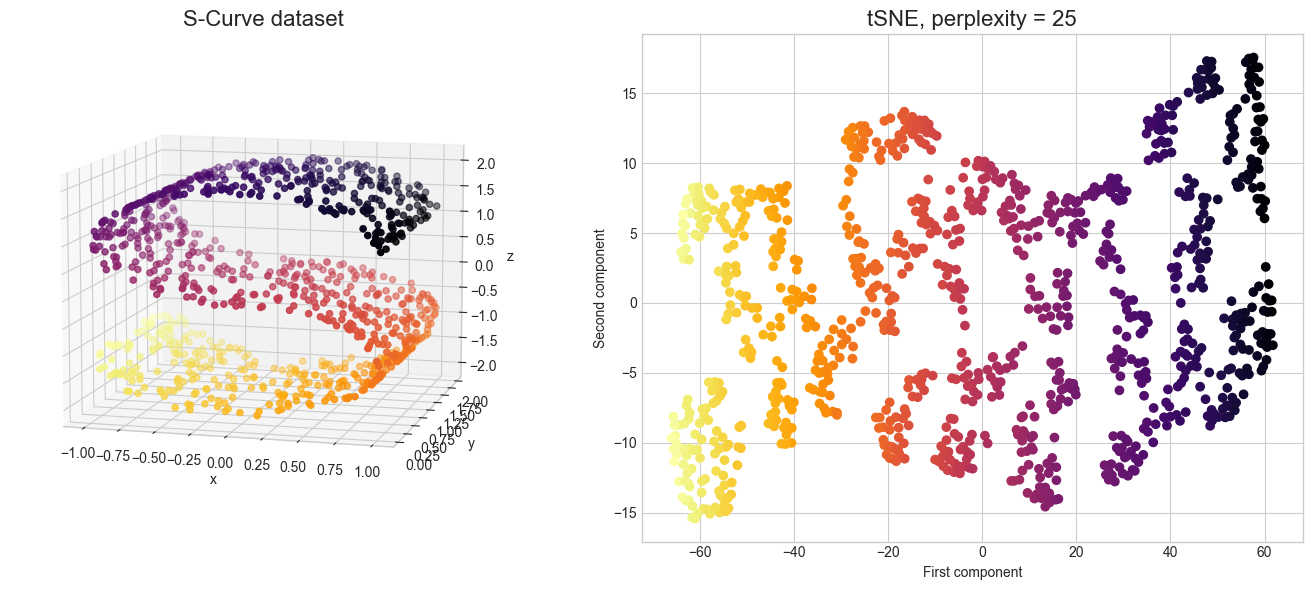

In [11]:
X, color = make_s_curve(n_samples =1000, random_state=42)
perplexity=25 # Can change
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
X_tsne = tsne.fit_transform(X)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("S-Curve dataset", fontsize=16)
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.inferno)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=10, azim=-75) 

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("tSNE, perplexity = %d"%perplexity, fontsize=16)
scatter2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.inferno)
ax2.set_xlabel('First component')
ax2.set_ylabel('Second component')
ax2.grid(True)

plt.tight_layout()
plt.show()
plt.close()




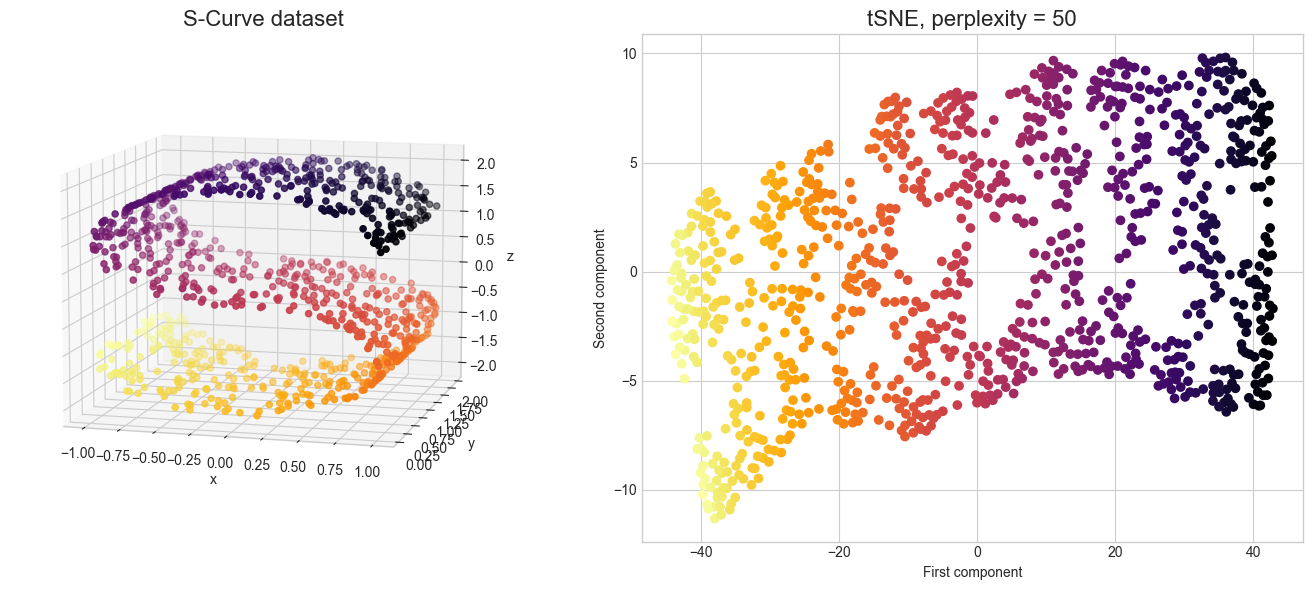

In [12]:
X, color = make_s_curve(n_samples =1000, random_state=42)
perplexity=50 # Can change
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
X_tsne = tsne.fit_transform(X)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("S-Curve dataset", fontsize=16)
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.inferno)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=10, azim=-75) 

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("tSNE, perplexity = %d"%perplexity, fontsize=16)
scatter2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.inferno)
ax2.set_xlabel('First component')
ax2.set_ylabel('Second component')
ax2.grid(True)

plt.tight_layout()
plt.show()
plt.close()




## 3.4) Swiss roll

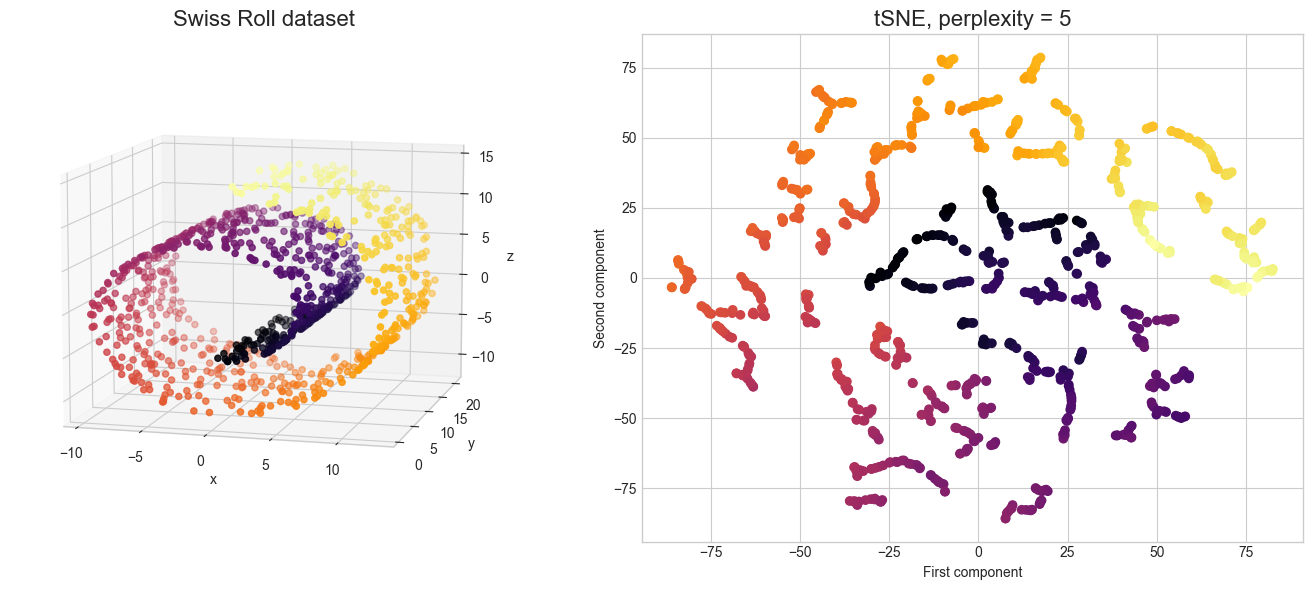

In [13]:
X, color = make_swiss_roll(n_samples =1000, random_state=42)
perplexity=5 # Can change
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
X_tsne = tsne.fit_transform(X)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("Swiss Roll dataset", fontsize=16)
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.inferno)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=10, azim=-75) 

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("tSNE, perplexity = %d"%perplexity, fontsize=16)
scatter2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.inferno)
ax2.set_xlabel('First component')
ax2.set_ylabel('Second component')
ax2.grid(True)

plt.tight_layout()
plt.show()
plt.close()




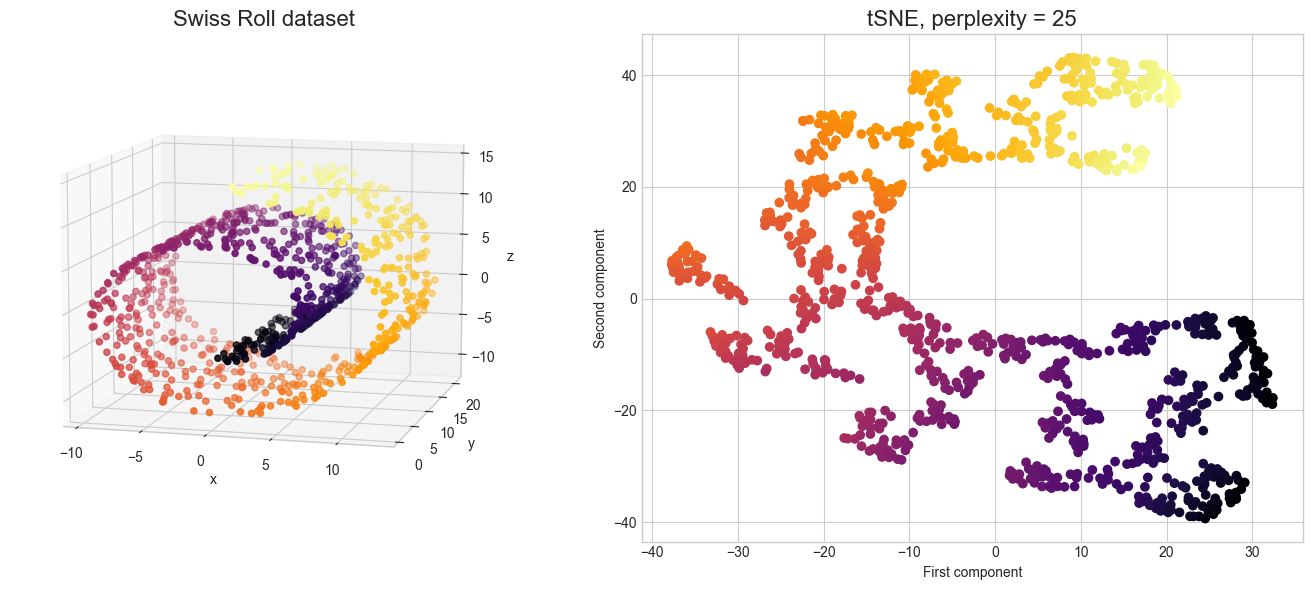

In [14]:
X, color = make_swiss_roll(n_samples =1000, random_state=42)
perplexity=25 # Can change
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
X_tsne = tsne.fit_transform(X)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("Swiss Roll dataset", fontsize=16)
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.inferno)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=10, azim=-75) 

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("tSNE, perplexity = %d"%perplexity, fontsize=16)
scatter2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.inferno)
ax2.set_xlabel('First component')
ax2.set_ylabel('Second component')
ax2.grid(True)

plt.tight_layout()
plt.show()
plt.close()




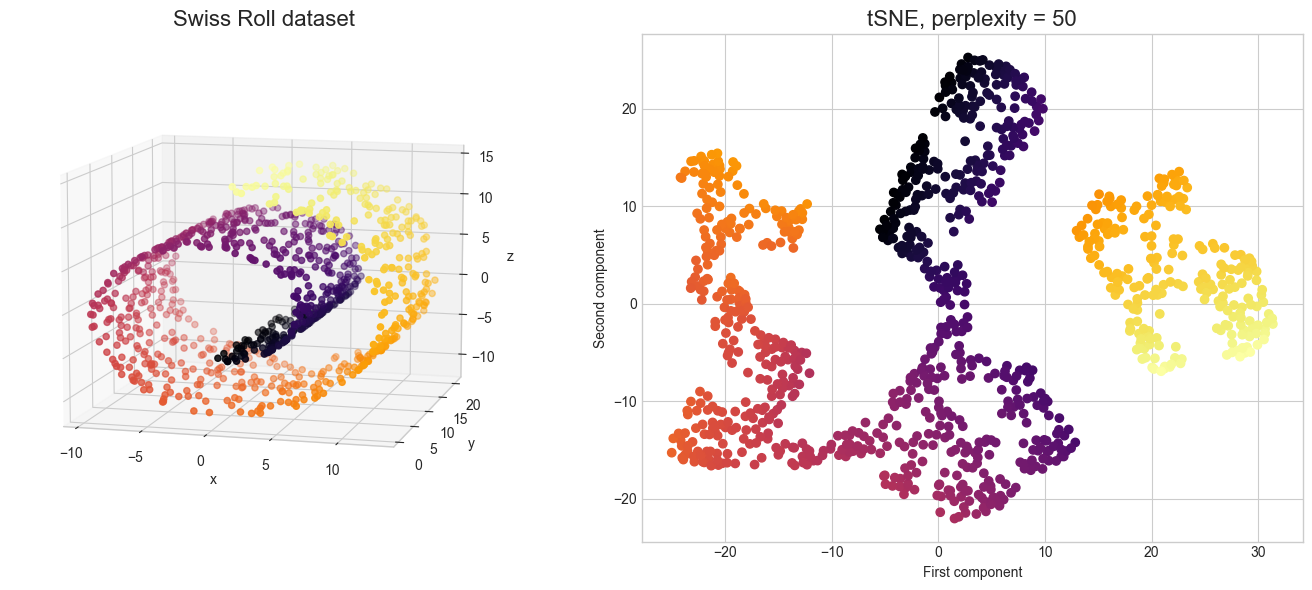

In [15]:
X, color = make_swiss_roll(n_samples =1000, random_state=42)
perplexity=50 # Can change
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
X_tsne = tsne.fit_transform(X)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("Swiss Roll dataset", fontsize=16)
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.inferno)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=10, azim=-75) 

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("tSNE, perplexity = %d"%perplexity, fontsize=16)
scatter2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.inferno)
ax2.set_xlabel('First component')
ax2.set_ylabel('Second component')
ax2.grid(True)

plt.tight_layout()
plt.show()
plt.close()




# 4) UMAP

## 4.1) Illustration

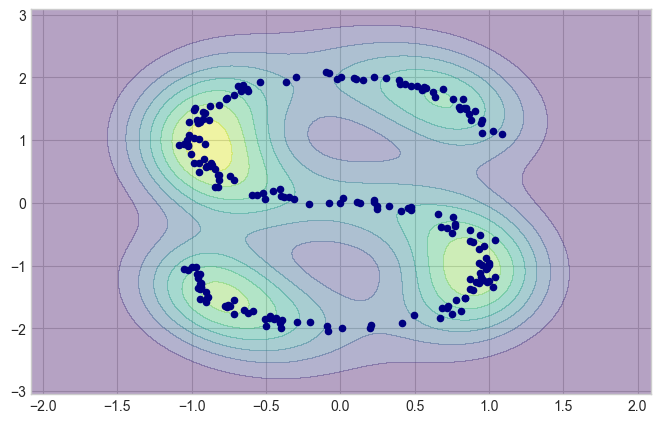

In [16]:

X, _ = make_s_curve(200, noise=0.05)
X = X[:, [0, 2]]  

kde = gaussian_kde(X.T)
xmin, ymin = X.min(axis=0) - 1
xmax, ymax = X.max(axis=0) + 1
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
density = np.reshape(kde(positions).T, xx.shape)

# Tracé
fig, ax = plt.subplots(figsize=(8, 5))

# Fond de densité lissé
ax.contourf(xx, yy, density, cmap="viridis", alpha=0.4)

# Points
ax.scatter(X[:, 0], X[:, 1], c='navy', s=20)

plt.show()


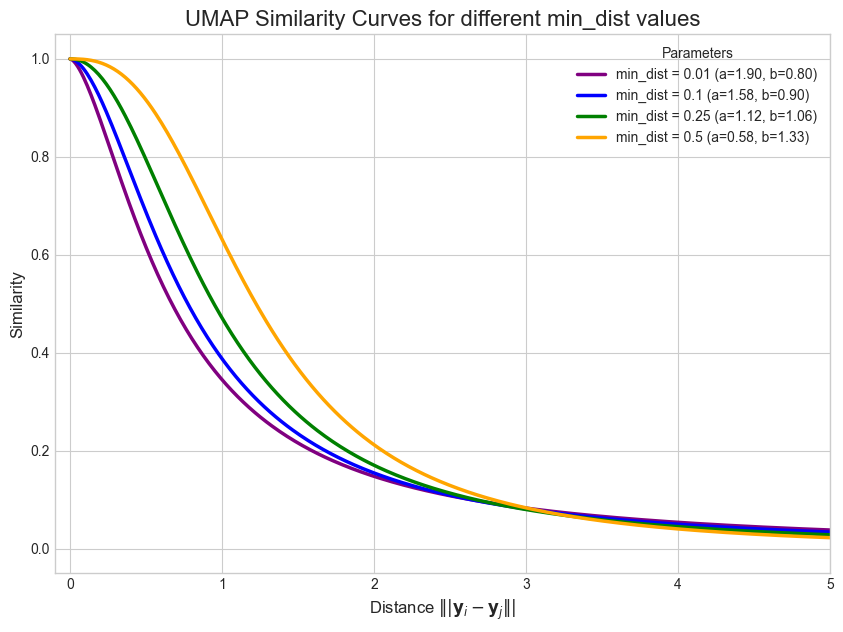

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def umap_low_dim_curve(d, a, b):
    return 1 / (1 + a * d**(2 * b))

def target_curve(d, min_dist):
    return np.where(d <= min_dist, 1, np.exp(-(d - min_dist)))

min_dist_values = [0.01, 0.1, 0.25, 0.5]
colors = ['purple', 'blue', 'green', 'orange']

plt.figure(figsize=(10, 7))
plt.style.use('seaborn-v0_8-whitegrid')

d_fit = np.linspace(0, 3, 300)

distances_plot = np.linspace(0, 5, 400)

for min_dist, color in zip(min_dist_values, colors):
    y_target = target_curve(d_fit, min_dist)
    
    (a, b), _ = curve_fit(umap_low_dim_curve, d_fit, y_target)
    
    similarities = umap_low_dim_curve(distances_plot, a, b)
    
    label = f"min_dist = {min_dist} (a={a:.2f}, b={b:.2f})"
    plt.plot(distances_plot, similarities, label=label, color=color, linewidth=2.5)

plt.title("UMAP Similarity Curves for different min_dist values", fontsize=16)
plt.xlabel(r"Distance $\||\mathbf{y}_i - \mathbf{y}_j\||$", fontsize=12)
plt.ylabel("Similarity", fontsize=12)
plt.legend(title="Parameters", fontsize=10)
plt.ylim(-0.05, 1.05)
plt.xlim(-0.1, 5)

plt.show()

In [18]:
#!pip install umap
#!pip install umap-learn
import umap 


/Users/corpetti/miniforge3/envs/rastereasy-022/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


## 4.2) S-Curve

/Users/corpetti/miniforge3/envs/rastereasy-022/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


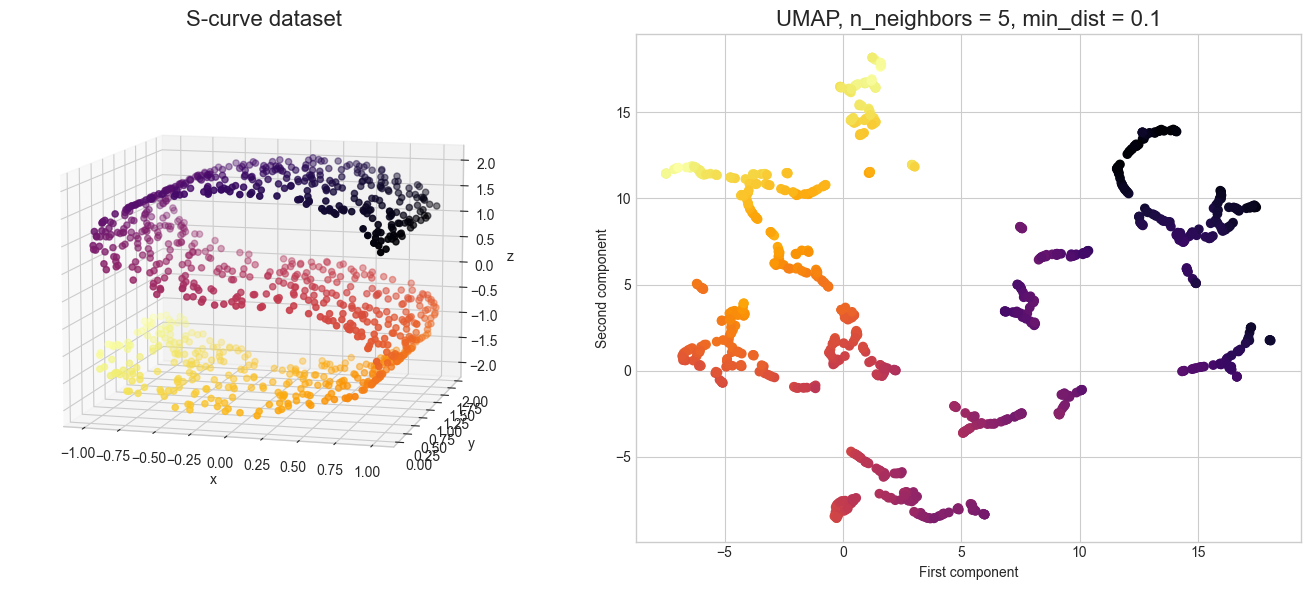

In [19]:

X, color = make_s_curve(n_samples=1000, random_state=42)

n_neighbors = 5   # The most similar parameter to t-SNE's perplexity
min_dist = 0.1     # Controls how tightly points are clustered together

reducer = umap.UMAP(
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=2,
    random_state=42
)
X_umap = reducer.fit_transform(X)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("S-curve dataset", fontsize=16)
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.inferno)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=10, azim=-75)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title(f"UMAP, n_neighbors = {n_neighbors}, min_dist = {min_dist}", fontsize=16) 
scatter2 = ax2.scatter(X_umap[:, 0], X_umap[:, 1], c=color, cmap=plt.cm.inferno) 
ax2.set_xlabel('First component')
ax2.set_ylabel('Second component')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()
plt.close()

/Users/corpetti/miniforge3/envs/rastereasy-022/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


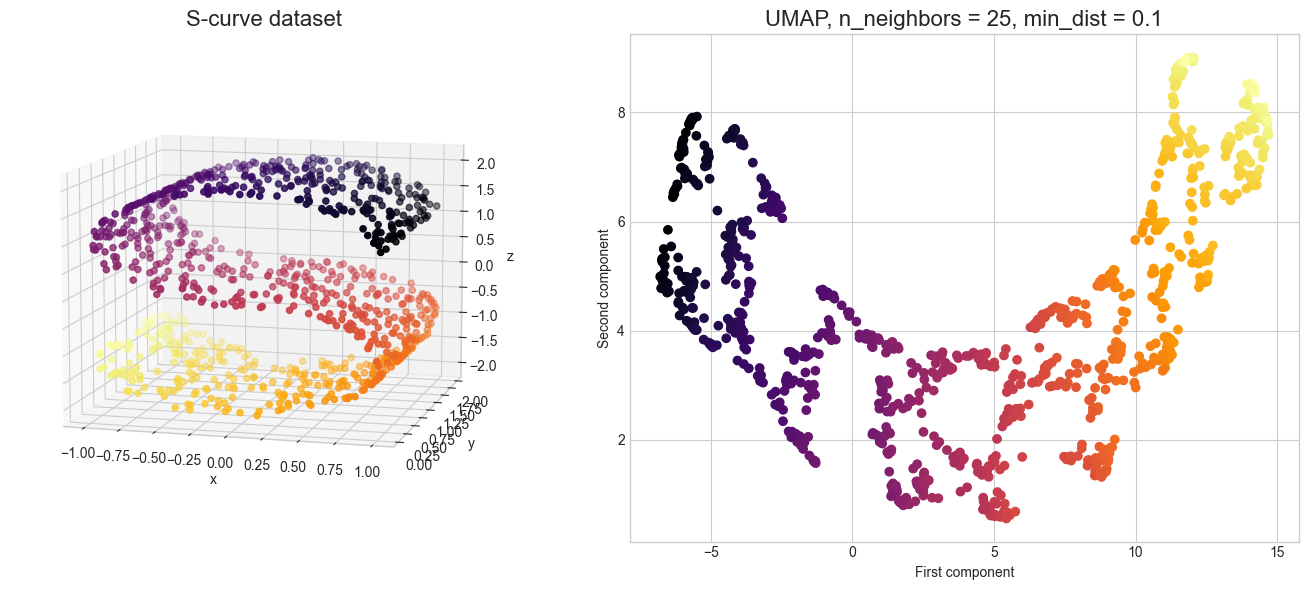

In [20]:

X, color = make_s_curve(n_samples=1000, random_state=42)

n_neighbors = 25   # The most similar parameter to t-SNE's perplexity
min_dist = 0.1     # Controls how tightly points are clustered together

reducer = umap.UMAP(
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=2,
    random_state=42
)
X_umap = reducer.fit_transform(X)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("S-curve dataset", fontsize=16)
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.inferno)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=10, azim=-75)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title(f"UMAP, n_neighbors = {n_neighbors}, min_dist = {min_dist}", fontsize=16) 
scatter2 = ax2.scatter(X_umap[:, 0], X_umap[:, 1], c=color, cmap=plt.cm.inferno) 
ax2.set_xlabel('First component')
ax2.set_ylabel('Second component')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()
plt.close()

/Users/corpetti/miniforge3/envs/rastereasy-022/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


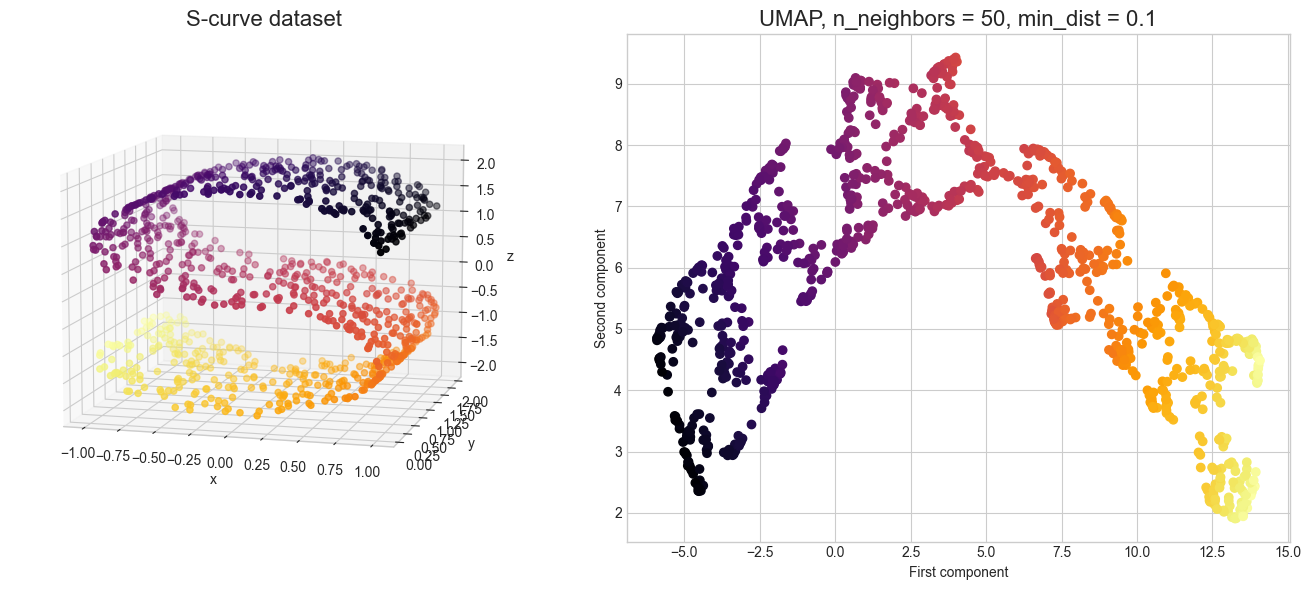

In [21]:

X, color = make_s_curve(n_samples=1000, random_state=42)

n_neighbors = 50   # The most similar parameter to t-SNE's perplexity
min_dist = 0.1     # Controls how tightly points are clustered together

reducer = umap.UMAP(
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=2,
    random_state=42
)
X_umap = reducer.fit_transform(X)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("S-curve dataset", fontsize=16)
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.inferno)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=10, azim=-75)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title(f"UMAP, n_neighbors = {n_neighbors}, min_dist = {min_dist}", fontsize=16) 
scatter2 = ax2.scatter(X_umap[:, 0], X_umap[:, 1], c=color, cmap=plt.cm.inferno) 
ax2.set_xlabel('First component')
ax2.set_ylabel('Second component')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()
plt.close()

## 4.3) Swiss Roll

/Users/corpetti/miniforge3/envs/rastereasy-022/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


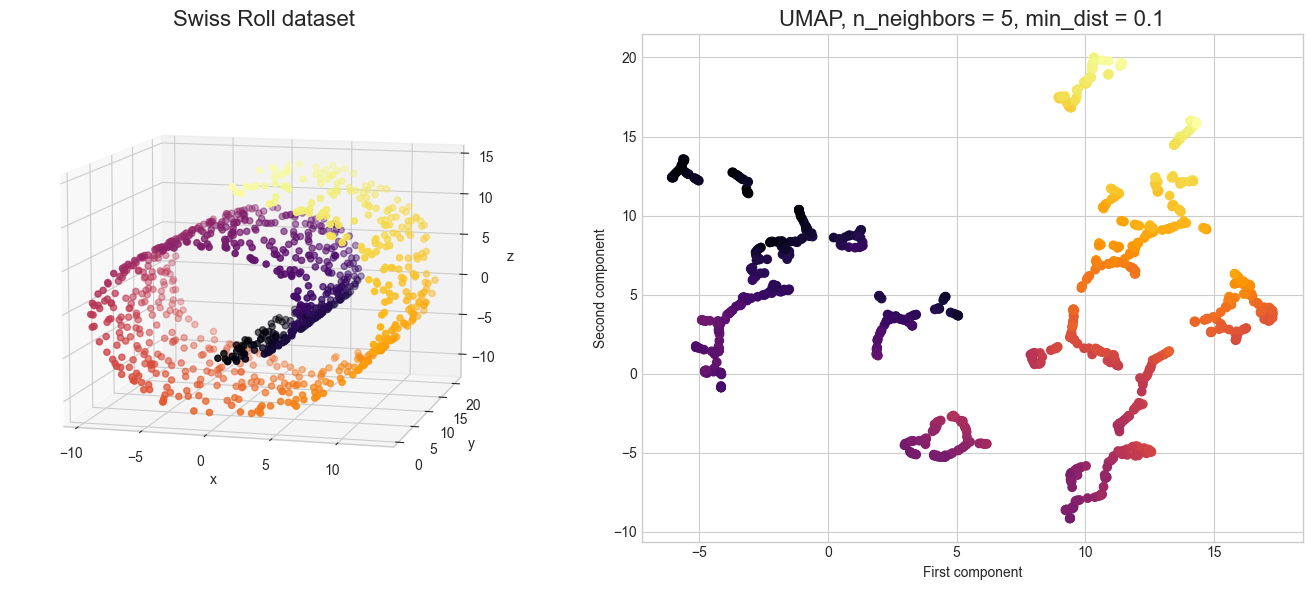

In [22]:

X, color = make_swiss_roll(n_samples=1000, random_state=42)

n_neighbors = 5   # The most similar parameter to t-SNE's perplexity
min_dist = 0.1    # Controls how tightly points are clustered together

# Instantiate and run UMAP
reducer = umap.UMAP(
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=2,
    random_state=42
)
X_umap = reducer.fit_transform(X)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("Swiss Roll dataset", fontsize=16)
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.inferno)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=10, azim=-75)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title(f"UMAP, n_neighbors = {n_neighbors}, min_dist = {min_dist}", fontsize=16) 
scatter2 = ax2.scatter(X_umap[:, 0], X_umap[:, 1], c=color, cmap=plt.cm.inferno) 
ax2.set_xlabel('First component')
ax2.set_ylabel('Second component')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()
plt.close()

/Users/corpetti/miniforge3/envs/rastereasy-022/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


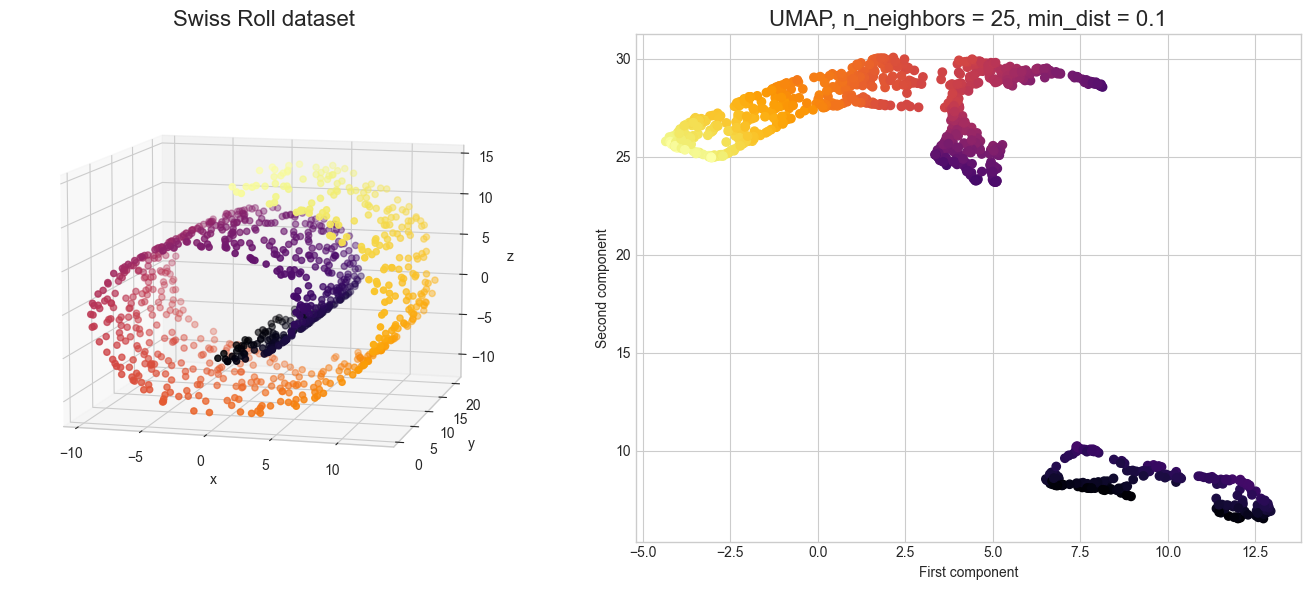

In [23]:

X, color = make_swiss_roll(n_samples=1000, random_state=42)

n_neighbors = 25   # The most similar parameter to t-SNE's perplexity
min_dist = 0.1    # Controls how tightly points are clustered together

# Instantiate and run UMAP
reducer = umap.UMAP(
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=2,
    random_state=42
)
X_umap = reducer.fit_transform(X)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("Swiss Roll dataset", fontsize=16)
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.inferno)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=10, azim=-75)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title(f"UMAP, n_neighbors = {n_neighbors}, min_dist = {min_dist}", fontsize=16) 
scatter2 = ax2.scatter(X_umap[:, 0], X_umap[:, 1], c=color, cmap=plt.cm.inferno) 
ax2.set_xlabel('First component')
ax2.set_ylabel('Second component')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()
plt.close()

/Users/corpetti/miniforge3/envs/rastereasy-022/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


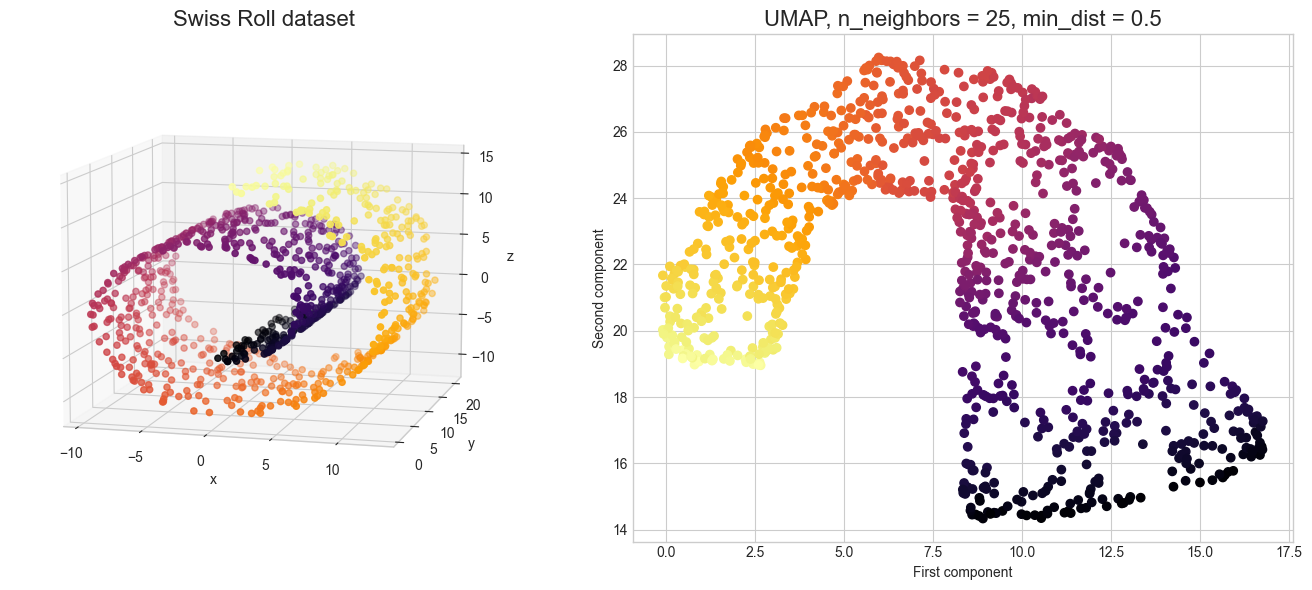

In [24]:

X, color = make_swiss_roll(n_samples=1000, random_state=42)

n_neighbors = 25   # The most similar parameter to t-SNE's perplexity
min_dist = 0.5    # Controls how tightly points are clustered together

# Instantiate and run UMAP
reducer = umap.UMAP(
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=2,
    random_state=42
)
X_umap = reducer.fit_transform(X)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("Swiss Roll dataset", fontsize=16)
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.inferno)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=10, azim=-75)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title(f"UMAP, n_neighbors = {n_neighbors}, min_dist = {min_dist}", fontsize=16) 
scatter2 = ax2.scatter(X_umap[:, 0], X_umap[:, 1], c=color, cmap=plt.cm.inferno) 
ax2.set_xlabel('First component')
ax2.set_ylabel('Second component')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()
plt.close()

/Users/corpetti/miniforge3/envs/rastereasy-022/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


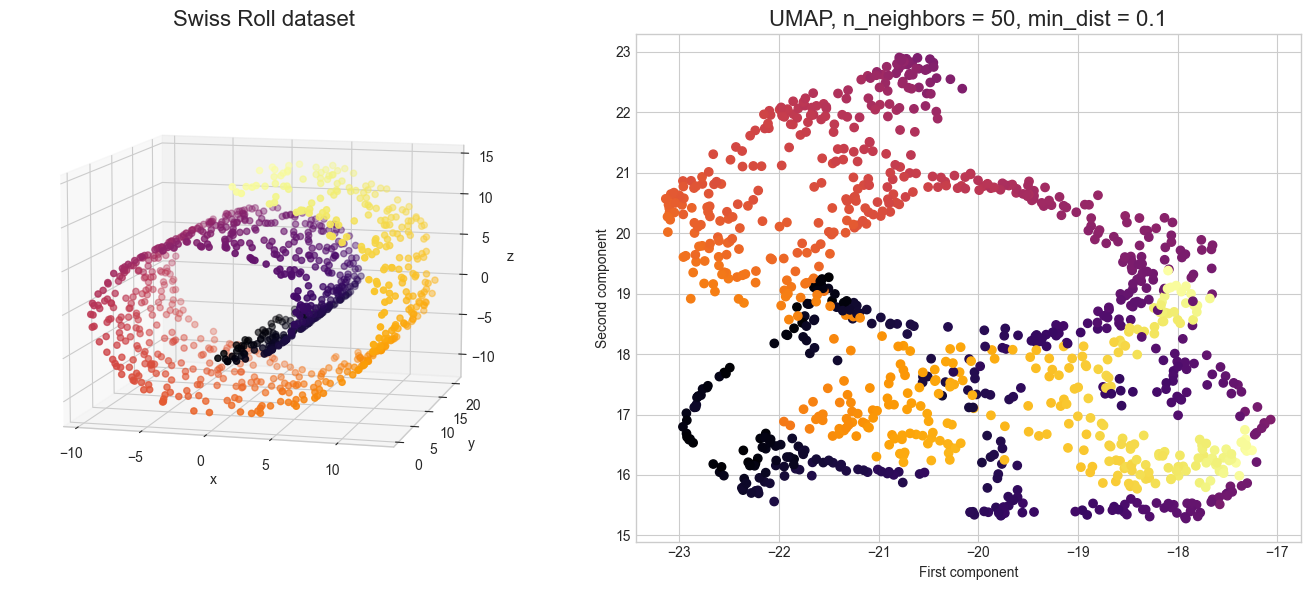

In [25]:

X, color = make_swiss_roll(n_samples=1000, random_state=42)

n_neighbors = 50   # The most similar parameter to t-SNE's perplexity
min_dist = 0.1     # Controls how tightly points are clustered together

# Instantiate and run UMAP
reducer = umap.UMAP(
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=2,
    random_state=42
)
X_umap = reducer.fit_transform(X)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("Swiss Roll dataset", fontsize=16)
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.inferno)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=10, azim=-75)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title(f"UMAP, n_neighbors = {n_neighbors}, min_dist = {min_dist}", fontsize=16) 
scatter2 = ax2.scatter(X_umap[:, 0], X_umap[:, 1], c=color, cmap=plt.cm.inferno) 
ax2.set_xlabel('First component')
ax2.set_ylabel('Second component')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()
plt.close()

/Users/corpetti/miniforge3/envs/rastereasy-022/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


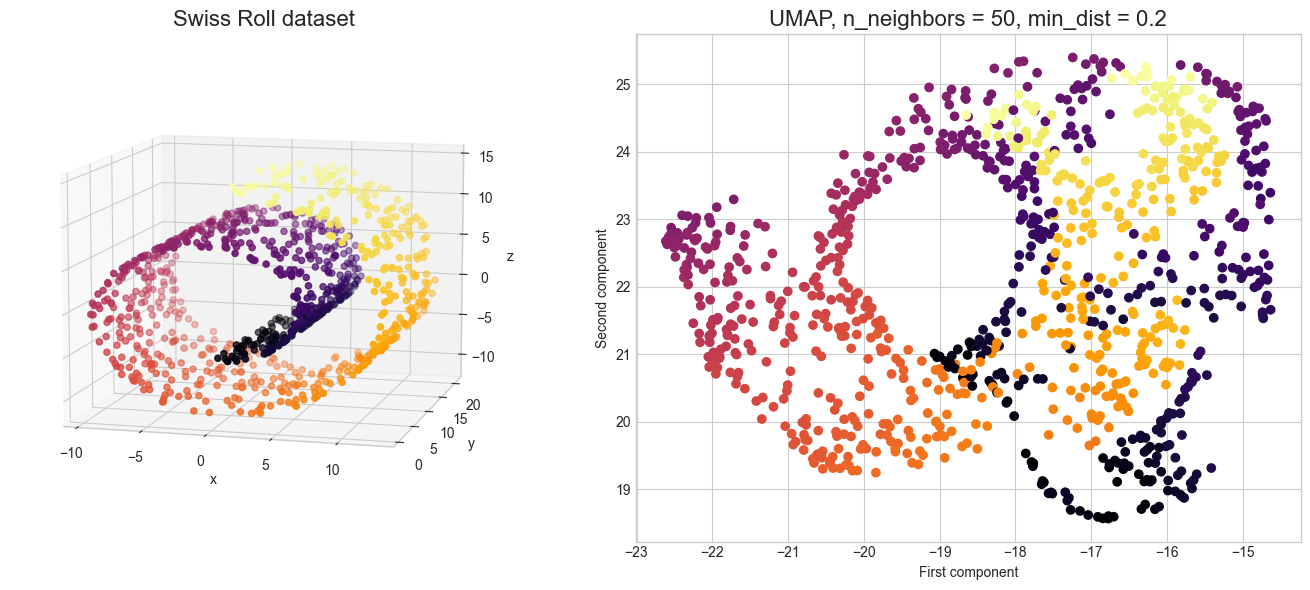

In [26]:

X, color = make_swiss_roll(n_samples=1000, random_state=42)

n_neighbors = 50   # The most similar parameter to t-SNE's perplexity
min_dist = 0.2     # Controls how tightly points are clustered together

# Instantiate and run UMAP
reducer = umap.UMAP(
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=2,
    random_state=42
)
X_umap = reducer.fit_transform(X)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("Swiss Roll dataset", fontsize=16)
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.inferno)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=10, azim=-75)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title(f"UMAP, n_neighbors = {n_neighbors}, min_dist = {min_dist}", fontsize=16)
scatter2 = ax2.scatter(X_umap[:, 0], X_umap[:, 1], c=color, cmap=plt.cm.inferno) 
ax2.set_xlabel('First component')
ax2.set_ylabel('Second component')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()
plt.close()